**# PRADYTHA GALUH PUTRANTI**

2304220013

STATISTIKA DAN SAINS DATA

# **# IMPORT LIBRARY DAN BACA DATASET**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Baca dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# **# 1. EKSPLORASI DATA**

In [4]:
print("===== Informasi Awal Dataset =====")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

===== Informasi Awal Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Statistik Deskriptif:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.30864

***A. Berapa jumlah total penumpang dalam data?***

In [5]:
# a. Jumlah total penumpang
total_penumpang = len(df)
print(f"\nJumlah total penumpang: {total_penumpang}")


Jumlah total penumpang: 891


***B. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.***


Jumlah penumpang yang SELAMAT (1) dan TIDAK SELAMAT (0):
Survived
0    549
1    342
Name: count, dtype: int64


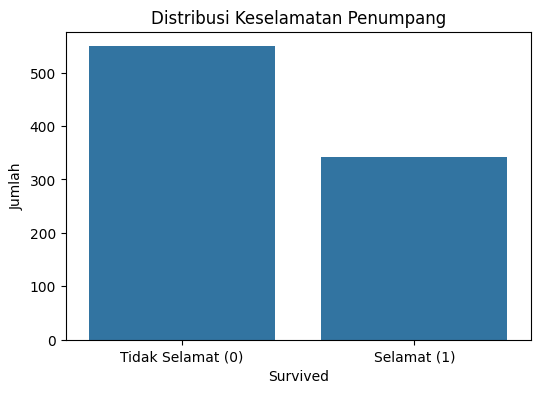

In [6]:
# b. Jumlah penumpang yang selamat dan tidak selamat
survival_counts = df['Survived'].value_counts()
print("\nJumlah penumpang yang SELAMAT (1) dan TIDAK SELAMAT (0):")
print(survival_counts)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')
plt.title("Distribusi Keselamatan Penumpang")
plt.xticks([0,1], ['Tidak Selamat (0)', 'Selamat (1)'])
plt.ylabel("Jumlah")
plt.show()

***C. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?***

In [7]:
# c. Rata-rata umur, termuda, tertua
mean_age = df['Age'].mean()
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"\nRata-rata umur penumpang: {mean_age:.2f}")
print(f"Penumpang termuda: {min_age}")
print(f"Penumpang tertua: {max_age}")


Rata-rata umur penumpang: 29.70
Penumpang termuda: 0.42
Penumpang tertua: 80.0


***D. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan***


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


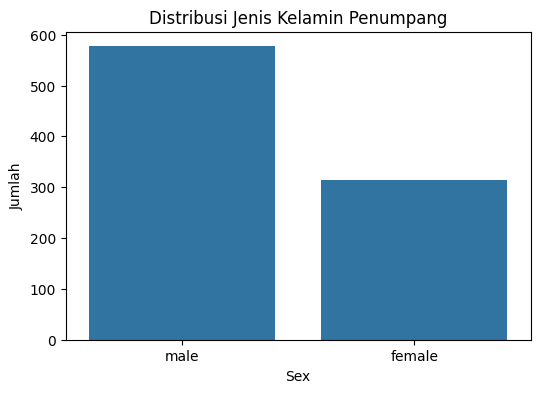

In [8]:
# d. Jumlah penumpang berdasarkan jenis kelamin
gender_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex')
plt.title("Distribusi Jenis Kelamin Penumpang")
plt.ylabel("Jumlah")
plt.show()

**E. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasi**


Jumlah penumpang berdasarkan kelas (Pclass):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Persentase penumpang di kelas 1: 24.24%


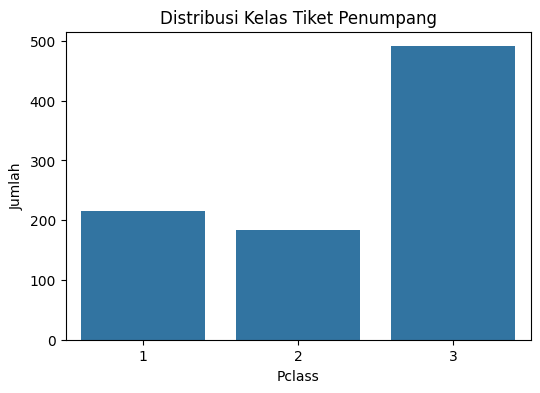

In [9]:
# e. Jumlah penumpang berdasarkan kelas dan persen kelas 1
kelas_counts = df['Pclass'].value_counts()
persen_kelas1 = (kelas_counts[1] / total_penumpang) * 100
print("\nJumlah penumpang berdasarkan kelas (Pclass):")
print(kelas_counts)
print(f"Persentase penumpang di kelas 1: {persen_kelas1:.2f}%")

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass')
plt.title("Distribusi Kelas Tiket Penumpang")
plt.ylabel("Jumlah")
plt.show()

# **# 2. PREPROCESSING**

***A. Apakah terdapat missing value pada data tersebut?***

In [10]:
# a. Cek missing value
print("\n=== Missing Value ===")
print(df.isnull().sum())


=== Missing Value ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


***B. Jika ya, apa yang anda lakukan?***

In [11]:
# b. Penanganan missing value
# Kolom Age diisi median, Embarked isi mode, Cabin drop
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Konfirmasi
print("\nSetelah penanganan missing value:")
print(df.isnull().sum())


Setelah penanganan missing value:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-11-27297310fa56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-11-27297310fa56>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

***C. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!***

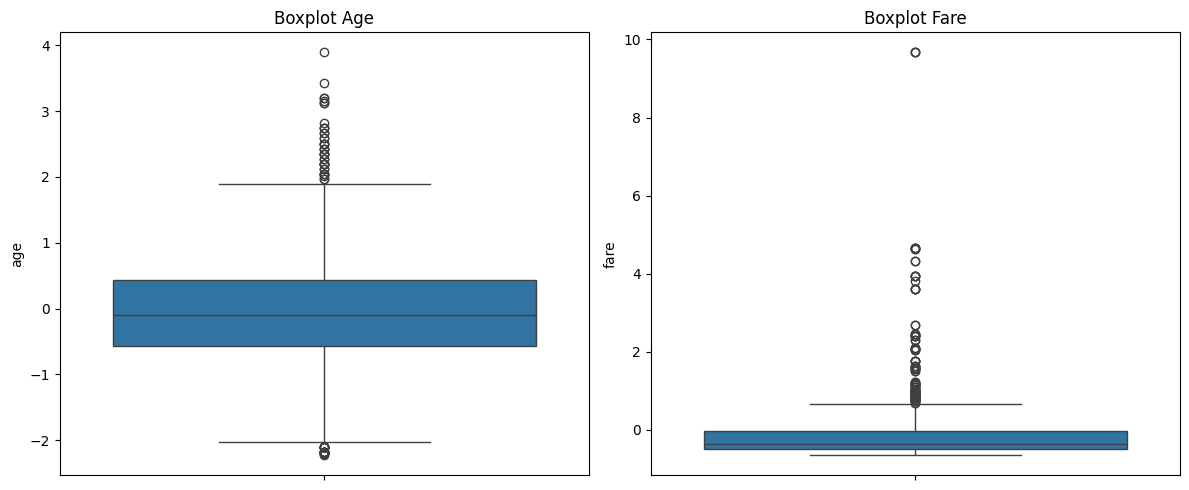

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='age')
plt.title('Boxplot Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='fare')
plt.title('Boxplot Fare')
plt.tight_layout()
plt.show()

***D. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?***


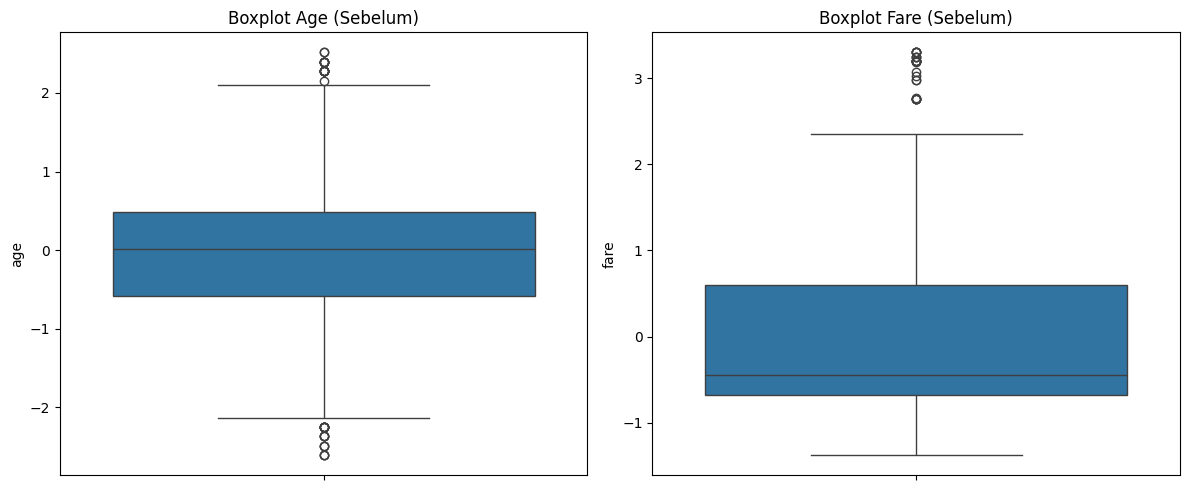

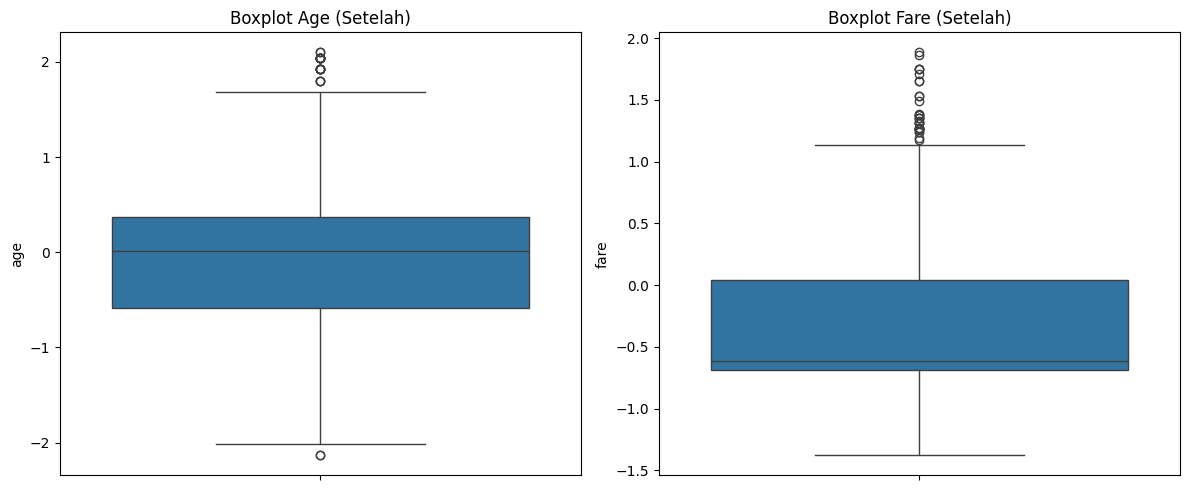

Jumlah data setelah menghapus outlier: 589


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan boxplot awal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot Age (Sebelum)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title('Boxplot Fare (Sebelum)')

plt.tight_layout()
plt.show()

# Deteksi outlier menggunakan metode IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Hapus outlier dari kolom 'age' dan 'fare'
df = remove_outliers_iqr(df, 'age')
df = remove_outliers_iqr(df, 'fare')

# Tampilkan boxplot setelah outlier dihapus
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot Age (Setelah)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fare'])
plt.title('Boxplot Fare (Setelah)')

plt.tight_layout()
plt.show()

# Cek jumlah data setelah menghapus outlier
print("Jumlah data setelah menghapus outlier:", len(df))


***E.  Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?***

In [27]:
# Pastikan library-nya sudah ter-import
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Tampilkan data sebelum distandardisasi (opsional)
print("Sebelum scaling:")
print(df[['age', 'fare']].describe())

# Inisialisasi fitur numerik yang akan di-scale
numerical = ['age', 'fare']

# Inisialisasi scaler
scaler = StandardScaler()

# Lakukan scaling pada kolom numerik dan simpan ke DataFrame
df[numerical] = scaler.fit_transform(df[numerical])

# Tampilkan data setelah distandardisasi
print("\nSetelah scaling:")
print(df[numerical].describe())

# Tampilkan beberapa baris pertama untuk konfirmasi visual
print("\nContoh hasil scaling (age dan fare):")
print(df[numerical].head())


Sebelum scaling:
              age        fare
count  589.000000  589.000000
mean    -0.005434   -0.216740
std      0.840169    0.698064
min     -2.131056   -1.375643
25%     -0.582152   -0.689877
50%      0.013581   -0.610993
75%      0.371020    0.042121
max      2.098644    1.882942

Setelah scaling:
                age          fare
count  5.890000e+02  5.890000e+02
mean  -4.222240e-17  4.523829e-17
std    1.000850e+00  1.000850e+00
min   -2.532145e+00 -1.661579e+00
25%   -6.870143e-01 -6.783608e-01
50%    2.265147e-02 -5.652608e-01
75%    4.484509e-01  3.711412e-01
max    2.506482e+00  3.010419e+00

Contoh hasil scaling (age dan fare):
        age      fare
0 -0.828947 -0.746223
2 -0.261215 -0.661001
4  1.016183 -0.645219
5  0.022651 -0.593668
8 -0.119282 -0.255934


**# 3. MODELING**

***A. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.***

Pembagian data bertujuan untuk:
* Training data: digunakan untuk melatih model.
* Testing data: digunakan untuk mengukur performa model pada data baru yang belum pernah dilihat.

Kalau tidak dibagi, model bisa overfitting: performa tinggi di data latih, tapi buruk di data baru.



***B. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?***

Umumnya digunakan:
* 80% data latih dan 20% data uji, atau
* 70% latih, 30% uji

Kita akan gunakan 80:20 karena:
* Dataset Titanic tidak terlalu besar
* Proporsi ini memberi cukup banyak data untuk pelatihan, dan cukup untuk pengujian



***CODE 3 A DAN 3 B***

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# --- 3a & 3b: Split Data ---

# Pisahkan fitur dan target
X = df.drop(columns=['survived'])
y = df['survived']

# Split 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 471
Jumlah data testing: 118


***C. Buatlah model klasifikasi dari 3 algortima yang berbeda. Jelaskan masing-masing model dan cara kerjanya***


Kita akan pakai:
1. Logistic Regression
* Model linear untuk klasifikasi biner (selamat/tidak).
* Menghitung probabilitas kelas berdasarkan fungsi logistik.

2. Decision Tree Classifier
* Membuat pohon keputusan berdasarkan fitur yang membagi data dengan informasi paling berguna.

3.  Random Forest Classifier
* Ensembel dari banyak decision tree → hasilnya lebih stabil dan akurat.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = df.drop('survived', axis=1)
y = df['survived']

# Split data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Latih model
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        87
           1       0.59      0.71      0.65        31

    accuracy                           0.80       118
   macro avg       0.74      0.77      0.75       118
weighted avg       0.81      0.80      0.80       118

Accuracy: 0.7966101694915254

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        87
           1       0.56      0.65      0.60        31

    accuracy                           0.77       118
   macro avg       0.71      0.73      0.72       118
weighted avg       0.78      0.77      0.78       118

Accuracy: 0.7711864406779662

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        87
           1       0.59      0.61      0.60        31

    accuracy                           0.79       

***D. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?***

In [32]:
# Mengimpor library yang dibutuhkan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Misalnya, y_true adalah label sebenarnya dan y_pred adalah hasil prediksi model
# Contoh data, ganti dengan hasil dari model Anda
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # Data asli (misalnya, 1 = selamat, 0 = tidak selamat)
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])  # Prediksi model

# Menghitung evaluasi metrik
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1-Score: 0.8000


***E. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.***




=== Hasil Evaluasi Tiga Model ===
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.796610   0.594595  0.709677  0.647059
1        Decision Tree  0.771186   0.555556  0.645161  0.597015
2        Random Forest  0.788136   0.593750  0.612903  0.603175


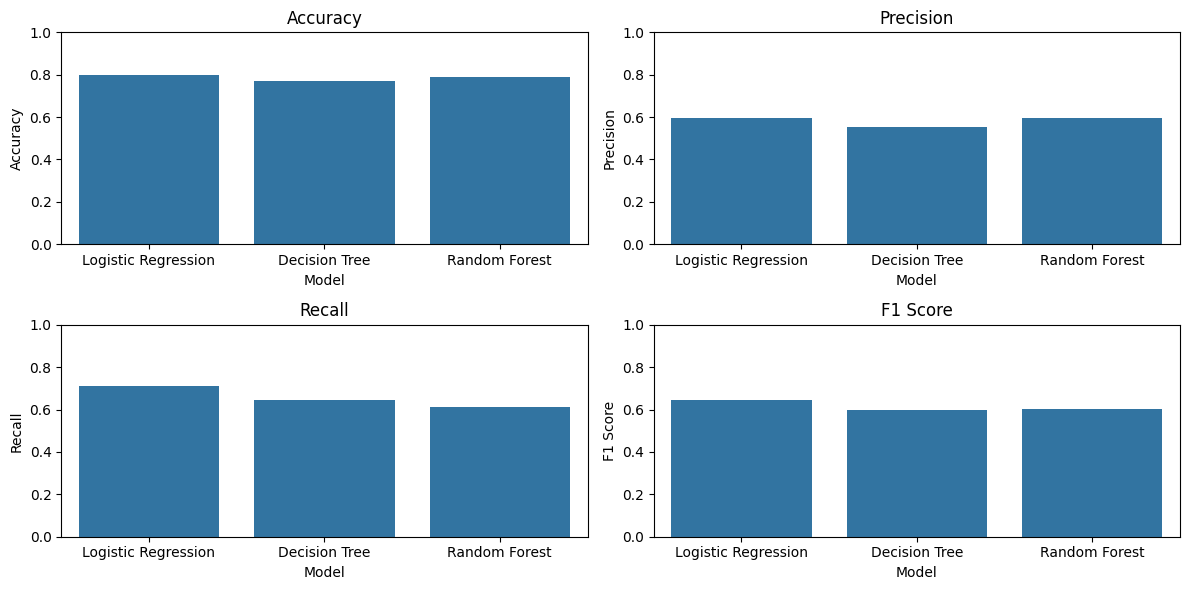

In [31]:
# --- 3e: Evaluasi & Bandingkan ---

# Simpan hasil evaluasi dalam DataFrame
hasil = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_tree),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_tree),
        recall_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_tree),
        f1_score(y_test, y_pred_rf)
    ]
})

# Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi Tiga Model ===")
print(hasil)

# Visualisasi hasil evaluasi
plt.figure(figsize=(12,6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=hasil)
    plt.title(metric)
    plt.ylim(0,1)

plt.tight_layout()
plt.show()

# **# 4. EVALUASI MODEL TERBAIK (Contoh: Random Forest)**

In [37]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [43]:
# 1. Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Upload file dari lokal ke Colab
from google.colab import files
uploaded = files.upload()

# 3. Load data
df = pd.read_csv('Titanic-Dataset.csv')  # atau 'Titanic-Dataset (2).csv' jika nama file berubah

# 4. Preprocessing sederhana
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 5. Pisahkan fitur dan target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 6. Split data (PERBAIKAN di sini)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Training model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Prediksi dan evaluasi
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Saving Titanic-Dataset.csv to Titanic-Dataset (4).csv
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



***A. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?***

In [42]:
# Classification report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# a. Precision dan Recall untuk penumpang yang "selamat" (label = 1)
precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print("=== A. Precision & Recall (Penumpang Selamat) ===")
print(f"Precision (selamat): {precision_selamat:.2f}")
print(f"Recall (selamat): {recall_selamat:.2f}")

=== A. Precision & Recall (Penumpang Selamat) ===
Precision (selamat): 0.70
Recall (selamat): 0.70


***B. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?***

In [44]:
# b. Hitung prediksi selamat dan kebenarannya
prediksi_selamat = y_pred == 1
jumlah_prediksi_selamat = prediksi_selamat.sum()
jumlah_benar_selamat = ((y_pred == 1) & (y_test == 1)).sum()

print("\n=== B. Evaluasi Jumlah Prediksi Selamat ===")
print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah dari mereka yang benar-benar selamat: {jumlah_benar_selamat}")


=== B. Evaluasi Jumlah Prediksi Selamat ===
Jumlah penumpang yang diprediksi selamat: 56
Jumlah dari mereka yang benar-benar selamat: 39
